In [192]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('dispatch.csv')

# Get the column numbers (indices) you want to keep
column_numbers_to_keep = [1, 2, 3, 8, 12, 13, 19, 20, 21]

# Keep the specified columns
df = df.iloc[:, column_numbers_to_keep]

print(len(df)) 

# Drop rows with any blank data
df.dropna(inplace=True)

print(len(df)) 

# Remove duplicate rows
df = df.drop_duplicates()

print(len(df))

# Display summary statistics of the dataset
#print(df.describe())

# Display information about the dataset, including column names and data types
#print(df.info())



421770
396313
396310


In [193]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numerical columns
non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Perform label encoding on non-numerical columns
label_encoder = LabelEncoder()
for column in non_numerical_columns:
    df[column] = label_encoder.fit_transform(df[column])



In [194]:
# Remove columns by name (> 0.05)
columns_to_remove = ['ZIPCODE', 'INCIDENT_DATETIME', 'INCIDENT_DISPATCH_AREA', 'BOROUGH']
df = df.drop(columns_to_remove, axis=1)

df = df.drop_duplicates()

print(len(df))


299727


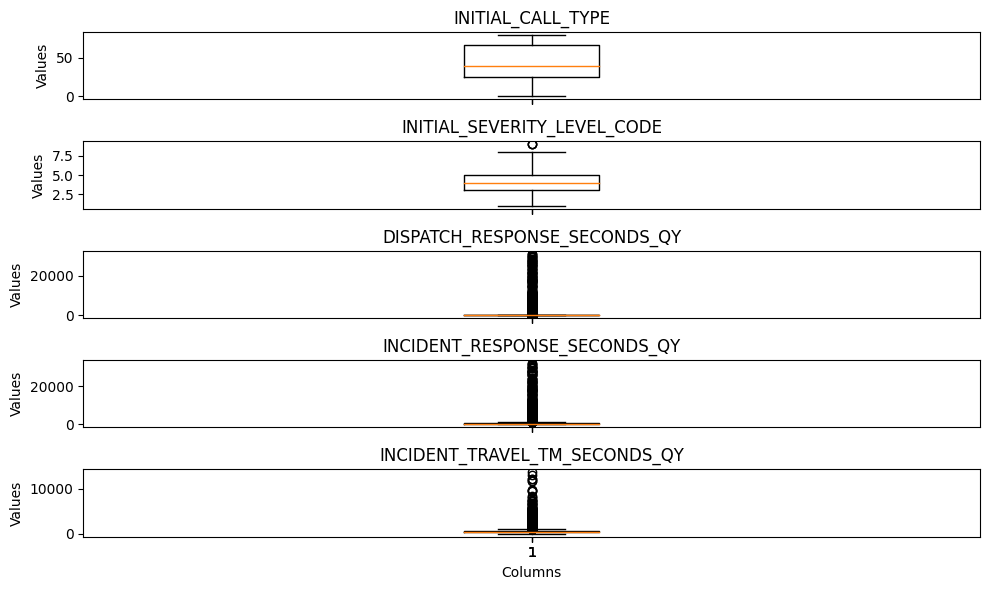

299727
259650


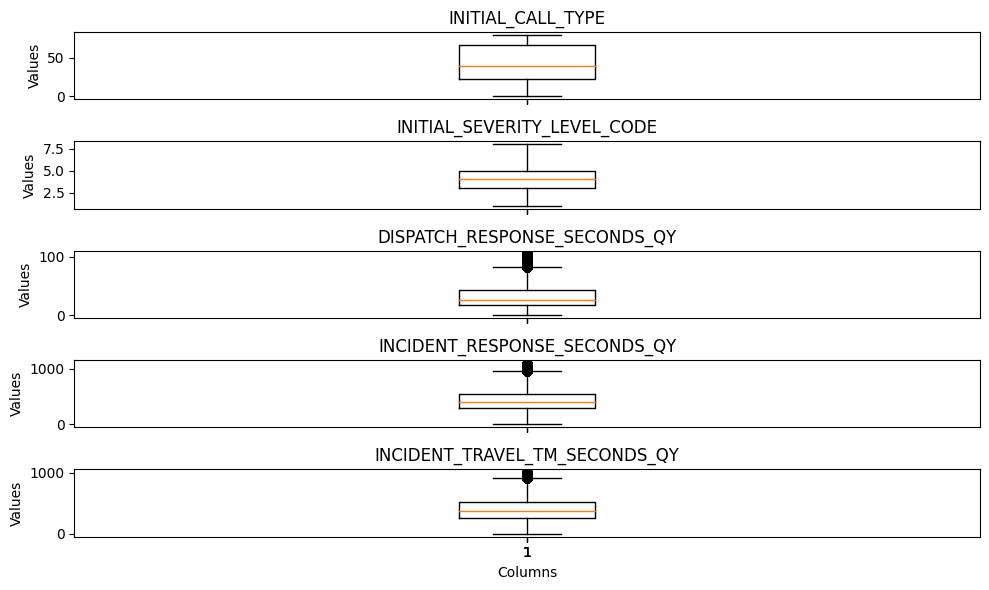

In [195]:
import matplotlib.pyplot as plt

# Get the number of columns in the DataFrame
num_columns = len(df.columns)

# Create subplots with individual scales for each column
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6), sharex=True)

# Iterate over each column and create a boxplot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

# Set the x-axis label for the last subplot
axes[-1].set_xlabel('Columns')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

print(len(df))

# Calculate the quartiles and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold multiplier
multiplier = 1.5

# Iterate over each column and remove outliers
for column in df.columns:
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1[column] - multiplier * IQR[column]
    upper_bound = Q3[column] + multiplier * IQR[column]
    
    # Remove rows with outliers in the current column
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

print(len(df))

# Get the number of columns in the DataFrame
num_columns = len(df.columns)

# Create subplots with individual scales for each column
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6), sharex=True)

# Iterate over each column and create a boxplot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

# Set the x-axis label for the last subplot
axes[-1].set_xlabel('Columns')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [196]:
from sklearn.model_selection import train_test_split

print(len(df))

# Separate the features (X) and the target variable (y)
X = df.drop('INCIDENT_RESPONSE_SECONDS_QY', axis=1)
y = df['INCIDENT_RESPONSE_SECONDS_QY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

259650


In [197]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor(),
]

# Train and save each model
for model in models:
    model.fit(X_train, y_train)

    # Save the model
    filename = f"{type(model).__name__}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)


In [204]:
import pickle
from sklearn.metrics import mean_squared_error


# Load the saved models and evaluate on train and test sets
for model in models:
    # Load the model
    filename = f"{type(model).__name__}.pkl"
    with open(filename, "rb") as file:
        loaded_model = pickle.load(file)
    
    # Make predictions on train and test sets
    y_test_pred = loaded_model.predict(X_test)
    y_train_pred = loaded_model.predict(X_train)
    
    # Calculate RMSE
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    
    # Print the RMSE values
    print(f"{type(loaded_model).__name__} Test RMSE: {test_rmse}")
    print(f"{type(loaded_model).__name__} Train RMSE: {train_rmse}")
    print()


LinearRegression Test RMSE: 0.19746135405305332
LinearRegression Train RMSE: 0.20799615923301285

DecisionTreeRegressor Test RMSE: 0.651576765943942
DecisionTreeRegressor Train RMSE: 0.0

RandomForestRegressor Test RMSE: 0.2972890089833705
RandomForestRegressor Train RMSE: 0.1413968068939581

MLPRegressor Test RMSE: 0.19996540963910667
MLPRegressor Train RMSE: 0.21037015284482777



In [203]:
import pickle

# Load the Linear Regression model
with open("LinearRegression.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions on train and test sets
y_test_pred = loaded_model.predict(X_test)

# Create a new DataFrame with the predicted values and y-test values
results_df = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

# Save the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)

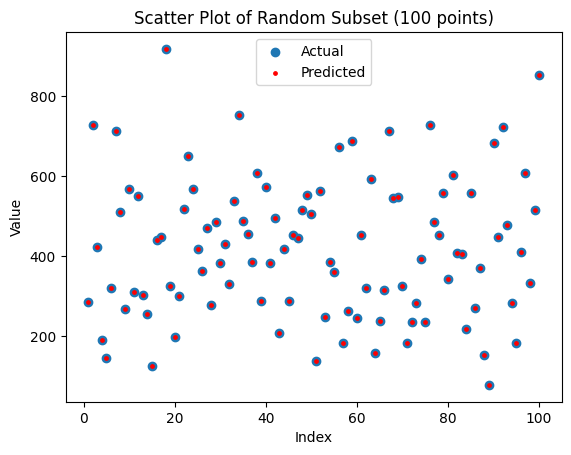

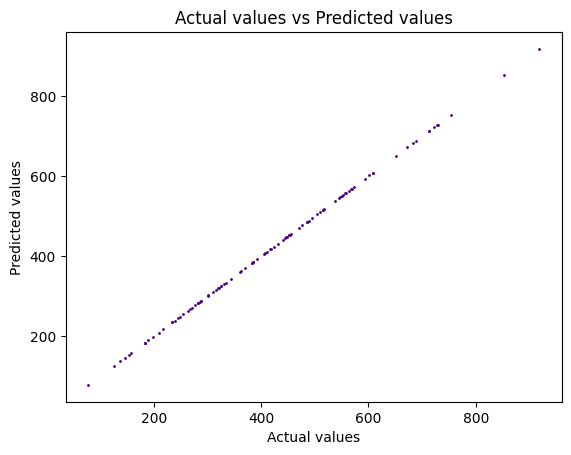

In [200]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the Linear Regression model
with open("LinearRegression.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions on the test set
y_test_pred = loaded_model.predict(X_test)

# Create a new DataFrame with the predicted values and y-test values
results_df = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

# Select a random subset of 100 points
random_indices = random.sample(range(len(results_df)), 100)
subset_results_df = results_df.iloc[random_indices]
x_values = np.arange(1, len(subset_results_df) + 1)

# Create scatter plot with the random subset of points
plt.scatter(x_values, subset_results_df['y_test'], label='Actual')
plt.scatter(x_values, subset_results_df['y_test_pred'], color='red', label='Predicted', s=6)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Random Subset (100 points)')
plt.legend()
plt.show()

# Create scatter plot
plt.scatter(subset_results_df['y_test'], subset_results_df['y_test_pred'], s=1, color='indigo')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual values vs Predicted values')
plt.show()


In [201]:
#import pandas as pd

# Read the CSV file
#df = pd.read_csv('o.csv')

# Remove rows with 'AM' or 'PM' in the 'INCIDENT_DATETIME' column
#column_name = 'INCIDENT_DATETIME'
#rows_to_exclude = ['AM', 'PM']
#df_filtered = df[~df[column_name].str.contains('|'.join(rows_to_exclude), na=False)]

# Create a new CSV file with the filtered data
#output_file = 'dispatch.csv'
#df_filtered.to_csv(output_file, index=False)

#print("Filtered data saved to", output_file)


In [202]:

#from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Separate the features (X) and the target variable (y)
#X = df.drop('INCIDENT_RESPONSE_SECONDS_QY', axis=1)
#y = df['INCIDENT_RESPONSE_SECONDS_QY']

# Perform feature selection using mutual information
#selector = SelectKBest(score_func=mutual_info_regression, k='all')
#X_selected = selector.fit_transform(X, y)

# Get the selected feature names and their corresponding scores
#selected_features_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features based on their scores in descending order
#sorted_features = selected_features_scores.sort_values(by='Score', ascending=False)

# Print the selected feature names and scores in descending order
#print("Selected features in descending order of importance:")
#print(sorted_features)